In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [9]:
!rm -rf /content/drive



In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download vencerlanz09/taco-dataset-yolo-format

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/taco-dataset-yolo-format
License(s): other
100% 232M/232M [00:11<00:00, 25.9MB/s]
100% 232M/232M [00:11<00:00, 21.3MB/s]


In [11]:
import os
import cv2
import glob

# Paths
train_images_path = "dataset/train/images"
train_labels_path = "dataset/train/labels"

# Load all training images and labels
image_paths = glob.glob(os.path.join(train_images_path, "*.jpg"))
label_paths = [path.replace("images", "labels").replace(".jpg", ".txt") for path in image_paths]


In [12]:
pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [13]:
import os

# Define the root directory of your dataset
dataset_dir = "/content/drive/My Drive/Waste Detection and Classification/"

# Check if expected folders exist
expected_folders = ["train", "valid", "test"]
for folder in expected_folders:
    folder_path = os.path.join(dataset_dir, folder)
    if not os.path.exists(folder_path):
        print(f"Missing folder: {folder_path}")
    else:
        print(f"Found folder: {folder_path}")

# Check for images and labels subfolders
for folder in ["train", "valid", "test"]:
    images_path = os.path.join(dataset_dir, folder, "images")
    labels_path = os.path.join(dataset_dir, folder, "labels")

    if not os.path.exists(images_path):
        print(f"Missing 'images' folder in {folder}")
    else:
        print(f"Found 'images' folder in {folder}")

    if not os.path.exists(labels_path):
        print(f"Missing 'labels' folder in {folder}")
    else:
        print(f"Found 'labels' folder in {folder}")


Found folder: /content/drive/My Drive/Waste Detection and Classification/train
Found folder: /content/drive/My Drive/Waste Detection and Classification/valid
Found folder: /content/drive/My Drive/Waste Detection and Classification/test
Found 'images' folder in train
Found 'labels' folder in train
Found 'images' folder in valid
Found 'labels' folder in valid
Found 'images' folder in test
Found 'labels' folder in test


In [14]:
!pip install albumentations opencv-python-headless


In [ ]:
import albumentations as A
from albumentations import HorizontalFlip, Rotate, RandomBrightnessContrast, HueSaturationValue

# Augmentation pipeline
transform = A.Compose([
    HorizontalFlip(p=0.5),
    Rotate(limit=30, p=0.5),
    RandomBrightnessContrast(p=0.2),
    HueSaturationValue(p=0.2),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))


In [ ]:
import os
import cv2
import random

# Paths
base_path = "/content/drive/My Drive/Waste Detection and Classification/train"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")
augmented_images_path = os.path.join(base_path, "augmented_images")
augmented_labels_path = os.path.join(base_path, "augmented_labels")

# Create directories for augmented data
os.makedirs(augmented_images_path, exist_ok=True)
os.makedirs(augmented_labels_path, exist_ok=True)

# Function to read YOLO labels
def read_yolo_labels(label_path):
    with open(label_path, "r") as file:
        lines = file.readlines()
    bboxes = []
    class_labels = []
    for line in lines:
        parts = line.strip().split()
        class_labels.append(int(parts[0]))
        bboxes.append([float(v) for v in parts[1:]])
    return bboxes, class_labels

# Function to save YOLO labels
def save_yolo_labels(label_path, bboxes, class_labels):
    with open(label_path, "w") as file:
        for cls, bbox in zip(class_labels, bboxes):
            file.write(f"{cls} {' '.join(map(str, bbox))}\n")

# Perform augmentation
for image_file in os.listdir(images_path):
    if not image_file.endswith((".jpg", ".png")):
        continue

    # Load image
    image_path = os.path.join(images_path, image_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Load corresponding label
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(labels_path, label_file)
    if not os.path.exists(label_path):
        continue
    bboxes, class_labels = read_yolo_labels(label_path)

    # Apply augmentations
    augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)
    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']
    augmented_labels = augmented['class_labels']

    # Save augmented image
    augmented_image_path = os.path.join(augmented_images_path, f"aug_{image_file}")
    cv2.imwrite(augmented_image_path, augmented_image)

    # Save augmented label
    augmented_label_path = os.path.join(augmented_labels_path, f"aug_{label_file}")
    save_yolo_labels(augmented_label_path, augmented_bboxes, augmented_labels)


KeyboardInterrupt: 

In [16]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 33.6 MB/s eta 0:00:00


In [17]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


In [ ]:
import os
from collections import Counter

# Path to your labels folder
labels_folder = "/content/drive/My Drive/Waste Detection and Classification/train/augmented_labels"

# Load the class names from your YOLO model's training setup
# Replace this with the actual class names used during training
class_names = [
    "Aluminium foil", "Bottle cap", "Bottle", "Broken glass", "Can", "Carton",
    "Cigarette", "Cup", "Lid", "Other litter", "Other plastic", "Paper",
    "Plastic bag - wrapper", "Plastic container", "Pop tab", "Straw",
    "Styrofoam piece", "Unlabeled litter"
]

# Counter to track occurrences of each class
class_counter = Counter()

# Iterate through all label files in the folder
for label_file in os.listdir(labels_folder):
    if label_file.endswith(".txt"):  # Only process text files
        label_path = os.path.join(labels_folder, label_file)

        # Read the label file
        with open(label_path, "r") as file:
            for line in file:
                # Get the class ID (first value in line) and handle it as a float
                try:
                    class_id = int(float(line.split()[0]))  # Convert to int safely
                    class_counter[class_id] += 1  # Increment the counter for this class ID
                except (ValueError, IndexError):
                    print(f"Skipping malformed line in {label_file}: {line.strip()}")

# Print all classes and their counts
print("Classes and their counts:")
for class_id, count in class_counter.items():
    class_name = class_names[class_id] if class_id < len(class_names) else "Unknown"
    print(f"{class_id}: {class_name} - {count} occurrences")

# Print any missing class IDs
all_class_ids = set(range(len(class_names)))
missing_classes = all_class_ids - set(class_counter.keys())
if missing_classes:
    print("\nMissing classes (not found in the dataset):")
    for class_id in missing_classes:
        print(f"{class_id}: {class_names[class_id]}")


Classes and their counts:
13: Plastic container - 156 occurrences
12: Plastic bag - wrapper - 2390 occurrences
5: Carton - 772 occurrences
16: Styrofoam piece - 333 occurrences
4: Can - 741 occurrences
6: Cigarette - 2269 occurrences
17: Unlabeled litter - 1451 occurrences
9: Other litter - 380 occurrences
1: Bottle cap - 1409 occurrences
2: Bottle - 836 occurrences
10: Other plastic - 783 occurrences
7: Cup - 613 occurrences
11: Paper - 407 occurrences
8: Lid - 265 occurrences
15: Straw - 392 occurrences
14: Pop tab - 227 occurrences
3: Broken glass - 383 occurrences
0: Aluminium foil - 145 occurrences


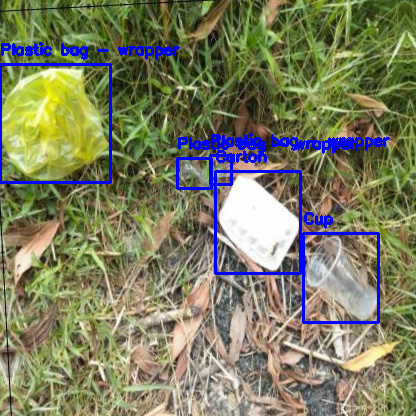

Output image saved to /content/drive/My Drive/Waste Detection and Classification/Output/output_image.jpg


In [ ]:
from google.colab.patches import cv2_imshow

def visualize_yolo_labels(image_path, label_path, class_names, output_path=None):
    import cv2
    import os

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not found at {image_path}")
        return

    # Load the labels
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts)
            class_id = int(class_id)

            # Convert YOLO format to bounding box coordinates
            img_h, img_w, _ = image.shape
            x_center, y_center, width, height = (
                x_center * img_w, y_center * img_h,
                width * img_w, height * img_h
            )
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            # Draw the bounding box
            color = (255, 0, 0)  # Blue box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            # Add the class label
            label_text = class_names[class_id]
            cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image with bounding boxes
    cv2_imshow(image)

    # Save the image if an output path is provided
    if output_path:
        cv2.imwrite(output_path, image)
        print(f"Output image saved to {output_path}")

# Example usage
image_path = "/content/drive/My Drive/Waste Detection and Classification/train/augmented_images/aug_000087_jpg.rf.ca51ec68ef2f288341fea9482b5b4318.jpg"
label_path = "/content/drive/My Drive/Waste Detection and Classification/train/augmented_labels/aug_000087_jpg.rf.ca51ec68ef2f288341fea9482b5b4318.txt"
output_path = "/content/drive/My Drive/Waste Detection and Classification/Output/output_image.jpg"
visualize_yolo_labels(image_path, label_path, class_names, output_path)


In [ ]:
import os
from collections import Counter

def count_classes_in_dataset(label_dir):
    """
    Count the occurrences of each class in a YOLO label dataset.

    Arguments:
    label_dir -- Path to the directory containing YOLO label files.

    Returns:
    class_counts -- Dictionary with class IDs as keys and counts as values.
    """
    class_counter = Counter()

    # Iterate over label files in the directory
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):  # Ensure it's a label file
            file_path = os.path.join(label_dir, label_file)
            with open(file_path, "r") as file:
                for line in file:
                    class_id = int(float(line.split()[0]))  # Extract class ID
                    class_counter[class_id] += 1

    return dict(class_counter)

# Example usage

# Replace these paths with your dataset paths
original_label_dir = "/content/drive/My Drive/Waste Detection and Classification/train/labels/"
augmented_label_dir = "/content/drive/My Drive/Waste Detection and Classification/train/augmented_labels"

original_counts = count_classes_in_dataset(original_label_dir)
augmented_counts = count_classes_in_dataset(augmented_label_dir)

print("Original Counts:", original_counts)
print("Augmented Counts:", augmented_counts)


Original Counts: {6: 2214, 7: 583, 17: 1419, 11: 369, 9: 356, 2: 821, 1: 1318, 8: 252, 4: 714, 13: 145, 15: 371, 5: 662, 12: 2228, 14: 225, 0: 142, 10: 751, 16: 304, 3: 376}
Augmented Counts: {13: 156, 12: 2390, 5: 772, 16: 333, 4: 741, 6: 2269, 17: 1451, 9: 380, 1: 1409, 2: 836, 10: 783, 7: 613, 11: 407, 8: 265, 15: 392, 14: 227, 3: 383, 0: 145}


In [19]:
import shutil
import os

# Define paths
original_image_folder = '/content/drive/My Drive/Waste Detection and Classification/train/images'
original_label_folder = '/content/drive/My Drive/Waste Detection and Classification/train/labels'
augmented_image_folder = '/content/drive/My Drive/Waste Detection and Classification/train/augmented_images'
augmented_label_folder = '/content/drive/My Drive/Waste Detection and Classification/train/augmented_labels'

merged_image_folder = '/content/drive/My Drive/Waste Detection and Classification/train/merged_images'
merged_label_folder = '/content/drive/My Drive/Waste Detection and Classification/train/merged_labels'

# Create the new folders if they don't exist
os.makedirs(merged_image_folder, exist_ok=True)
os.makedirs(merged_label_folder, exist_ok=True)

# Function to copy files to merged folders
def copy_files(source_folder, dest_folder, prefix=""):
    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # You can add more image formats if needed
            # Create new file name to avoid overwriting
            new_filename = prefix + filename
            shutil.copy(os.path.join(source_folder, filename), os.path.join(dest_folder, new_filename))

# Copy original images and labels
copy_files(original_image_folder, merged_image_folder, prefix="original_")
copy_files(original_label_folder, merged_label_folder, prefix="original_")

# Copy augmented images and labels
copy_files(augmented_image_folder, merged_image_folder, prefix="augmented_")
copy_files(augmented_label_folder, merged_label_folder, prefix="augmented_")

print("Files merged successfully!")


Files merged successfully!


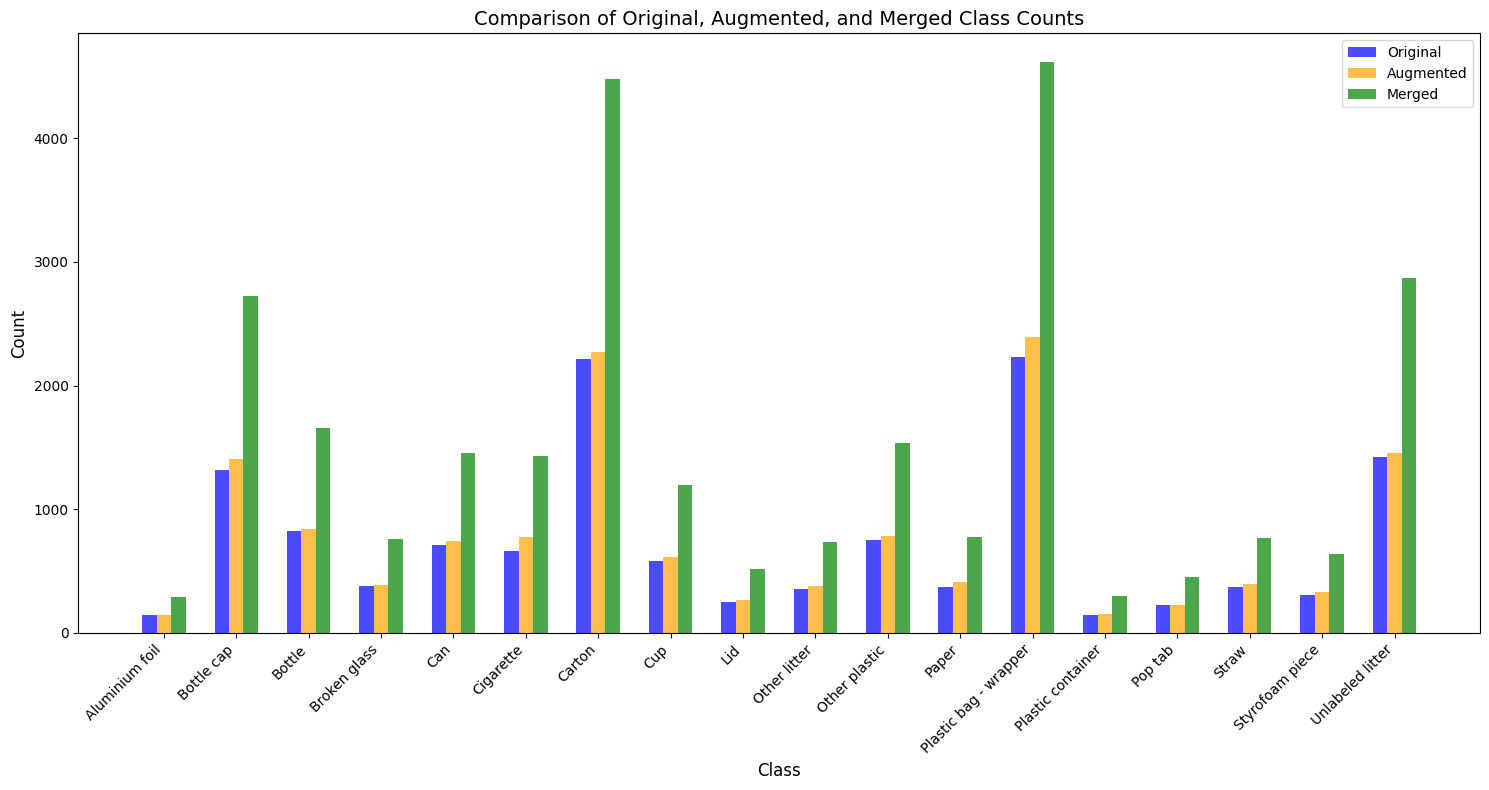

Original Counts: {6: 2214, 7: 583, 17: 1419, 11: 369, 9: 356, 2: 821, 1: 1318, 8: 252, 4: 714, 13: 145, 15: 371, 5: 662, 12: 2228, 14: 225, 0: 142, 10: 751, 16: 304, 3: 376}
Augmented Counts: {1: 1409, 2: 836, 4: 741, 12: 2390, 10: 783, 0: 145, 11: 407, 5: 772, 6: 2269, 17: 1451, 7: 613, 8: 265, 15: 392, 14: 227, 9: 380, 16: 333, 13: 156, 3: 383}
Merged Counts: {6: 4483, 7: 1196, 17: 2870, 11: 776, 9: 736, 2: 1657, 1: 2727, 8: 517, 4: 1455, 13: 301, 15: 763, 5: 1434, 12: 4618, 14: 452, 0: 287, 10: 1534, 16: 637, 3: 759}


In [23]:
import os
import matplotlib.pyplot as plt

# Function to get class counts from label files
def get_class_counts(label_folder):
    class_counter = {}
    for filename in os.listdir(label_folder):
        # Only process .txt label files
        if filename.endswith('.txt'):
            with open(os.path.join(label_folder, filename), 'r') as file:
                for line in file:
                    try:
                        # Try to convert directly to integer
                        class_id = int(line.split()[0])
                    except ValueError:
                        # If direct conversion fails, try converting from float
                        class_id = int(float(line.split()[0]))

                    # Count occurrences of each class
                    class_counter[class_id] = class_counter.get(class_id, 0) + 1

    return class_counter

# Define paths to original and augmented label folders
original_labels_folder = '/content/drive/My Drive/Waste Detection and Classification/train/labels'
augmented_labels_folder = '/content/drive/My Drive/Waste Detection and Classification/train/augmented_labels'

# Get the class counts for both original and augmented datasets
original_counts = get_class_counts(original_labels_folder)
augmented_counts = get_class_counts(augmented_labels_folder)

# Merge the counts: Adding the original and augmented class counts
merged_counts = original_counts.copy()  # Start with the original counts
for class_id, count in augmented_counts.items():
    # If class_id already exists, add the count, otherwise just set the count
    merged_counts[class_id] = merged_counts.get(class_id, 0) + count

# Create a list of class labels
class_names = [
    "Aluminium foil", "Bottle cap", "Bottle", "Broken glass", "Can", "Cigarette",
    "Carton", "Cup", "Lid", "Other litter", "Other plastic", "Paper",
    "Plastic bag - wrapper", "Plastic container", "Pop tab", "Straw",
    "Styrofoam piece", "Unlabeled litter"
]

# Prepare data for plotting
labels = class_names
original_values = [original_counts.get(i, 0) for i in range(len(class_names))]
augmented_values = [augmented_counts.get(i, 0) for i in range(len(class_names))]
merged_values = [merged_counts.get(i, 0) for i in range(len(class_names))]

# Plotting the comparison graph
x = range(len(labels))

plt.figure(figsize=(15, 8))
plt.bar([x - 0.2 for x in x], original_values, width=0.2, label='Original', color='blue', alpha=0.7)
plt.bar([x for x in x], augmented_values, width=0.2, label='Augmented', color='orange', alpha=0.7)
plt.bar([x + 0.2 for x in x], merged_values, width=0.2, label='Merged', color='green', alpha=0.7)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Comparison of Original, Augmented, and Merged Class Counts', fontsize=14)
plt.xticks(x, labels, rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print out the counts for verification
print("Original Counts:", original_counts)
print("Augmented Counts:", augmented_counts)
print("Merged Counts:", merged_counts)